In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, :-1]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


R-squared score test data: 0.981
MAE fitted train data: 0.792


Text(0, 0.5, 'Residuals')

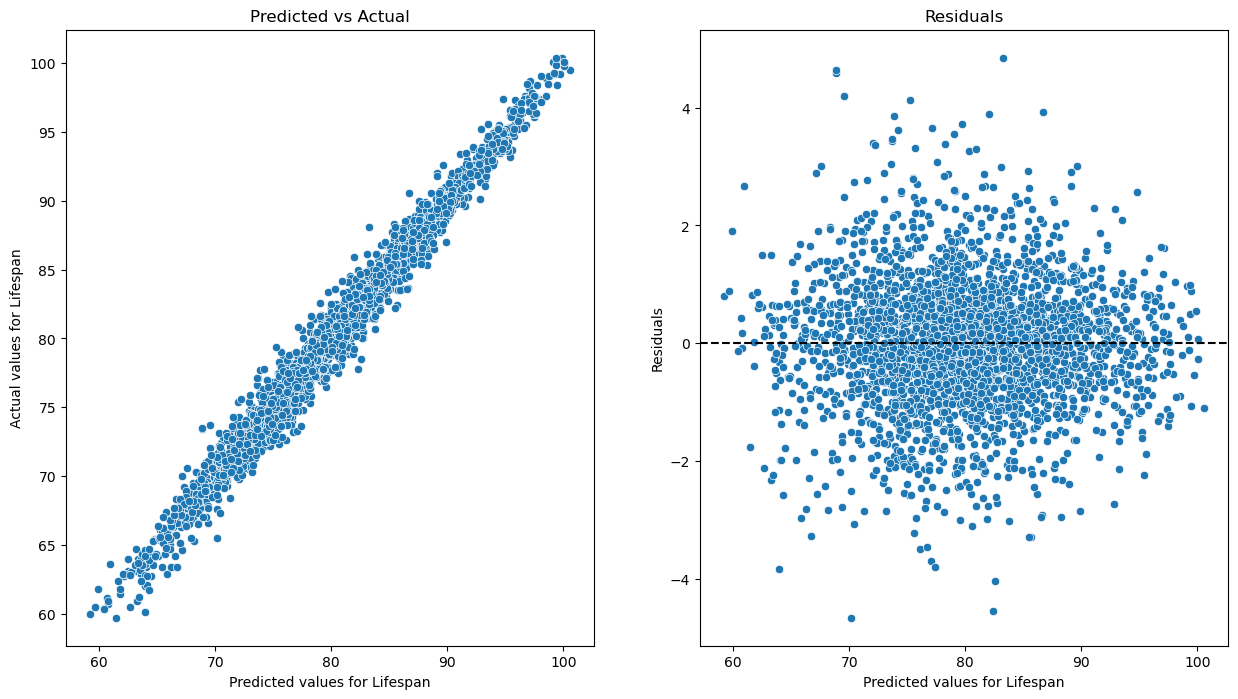

In [2]:
pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")


# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

R-squared score test data: 0.981
MAE fitted train data: 0.792


Text(0, 0.5, 'Residuals')

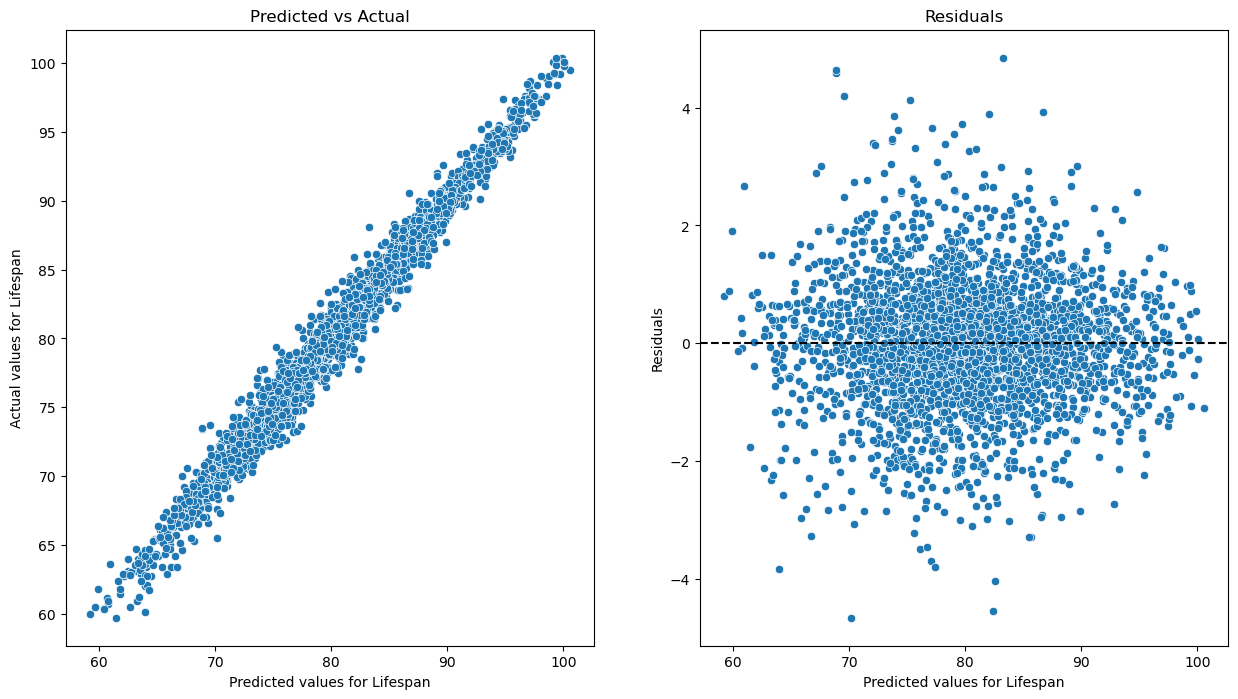

In [3]:
df_iqr_cleaned = pd.read_csv('../data/data_iqr_cleaned.csv')
X = df_iqr_cleaned.iloc[:, :-1]
y = df_iqr_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

R-squared score test data: 0.979
MAE fitted train data: 0.846


Text(0, 0.5, 'Residuals')

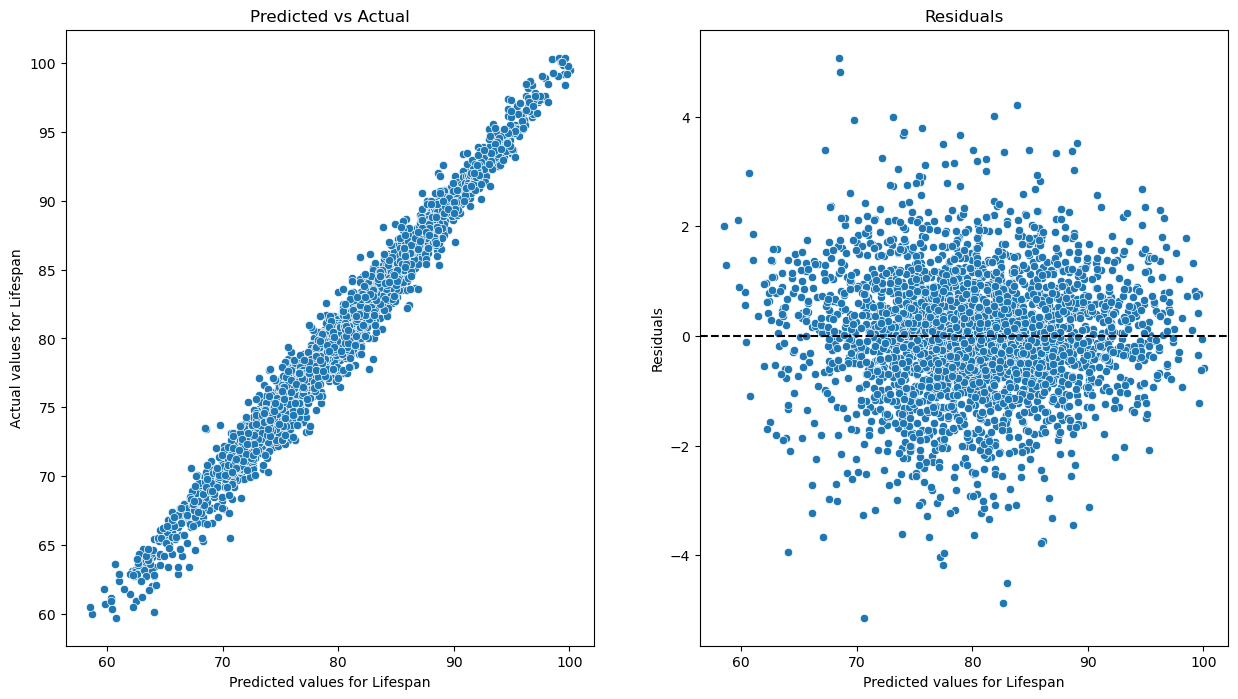

In [4]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, :-1]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('power', PowerTransformer()), ('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

In [7]:
from itertools import combinations, chain
from tqdm import tqdm

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
df_cleaned["mass_square"] = df_cleaned['mass']**2
df_cleaned["bmi_square"] = df_cleaned['bmi']**2
df_cleaned["length_sqrt"] = np.power(df_cleaned['length'], 1/2)
df_cleaned["alcohol_square"] = df_cleaned['alcohol']**2
df_cleaned["sugar_square"] = df_cleaned['sugar']**2
df_cleaned["exercise_sqrt"] = np.power(df_cleaned['exercise'], 1/2)

s = list(df_cleaned.loc[:, ~df_cleaned.columns.isin(['lifespan'])].columns)
combi = chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

feature_combinations = list(combi)[1:]
scores = dict()

for features in tqdm(feature_combinations):
    X = df_cleaned.loc[:, df_cleaned.columns.isin(list(features))]
    y = df_cleaned['lifespan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    pipe = Pipeline([('scale', StandardScaler()), ('model', LinearRegression())])
    # The pipeline can be used as any other estimator
    # and avoids leaking the test set into the train set
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # calculate residuals
    residuals = y_train - y_train_pred
    # print(f"Features trained on: {features}")
    # print(f"R-squared score train data: {pipe.score(X_train, y_train):.3f}")
    # print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
    # print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
    # print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")
    # print(f"Coefficients: {pipe.named_steps['model'].coef_}")
    scores[pipe.score(X_test, y_test)] = { 'coefficients': {x: y for x, y in zip(features, pipe.named_steps['model'].coef_)},
                                           'r2 train': round(pipe.score(X_train, y_train), 3),
                                           'r2 test': round(pipe.score(X_test, y_test), 3), 
                                           'MAE train': round(mean_absolute_error(y_train, y_train_pred), 3), 
                                           'MAE test': round(mean_absolute_error(y_test, y_test_pred), 3) 
                                         }



dict(sorted(scores.items(), reverse=True))


100%|██████████| 16383/16383 [02:21<00:00, 115.57it/s]


{0.982163719608472: {'coefficients': {'genetic': 7.077362451634066,
   'bmi': 1.0424775118840426,
   'exercise': 0.9377242839229685,
   'smoking': -1.8291549380039225,
   'alcohol': -0.3886425351150935,
   'sugar': -0.2130798438637264,
   'bmi_square': -1.5850578309224863,
   'sugar_square': 0.00767736764179433},
  'r2 train': 0.98,
  'r2 test': 0.982,
  'MAE train': 0.767,
  'MAE test': 0.736},
 0.9821629322338806: {'coefficients': {'genetic': 7.077410756009005,
   'bmi': 1.0425931531444763,
   'exercise': 0.9377473233723866,
   'smoking': -1.8291489752353831,
   'alcohol': -0.3886076859841025,
   'sugar': -0.20560953088093423,
   'bmi_square': -1.5852409422186735},
  'r2 train': 0.98,
  'r2 test': 0.982,
  'MAE train': 0.767,
  'MAE test': 0.736},
 0.982161034944628: {'coefficients': {'genetic': 7.077396130247279,
   'bmi': 1.0406343795617186,
   'exercise': 0.9377335073417218,
   'smoking': -1.8291288087737063,
   'alcohol': -0.3886381742599522,
   'sugar': -0.2132907257207181,
   '

R-squared score test data: 0.982
MAE fitted train data: 0.766


Text(0, 0.5, 'Residuals')

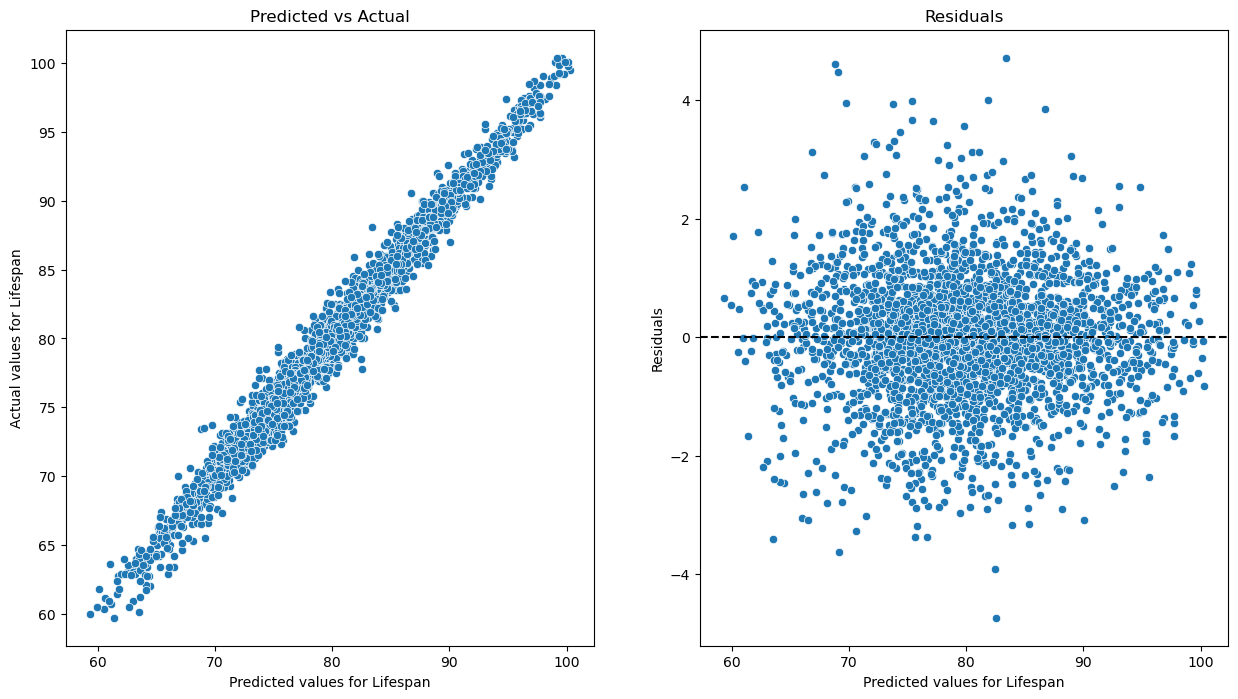

In [6]:

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
df_cleaned["mass_square"] = df_cleaned['mass']**2
df_cleaned["bmi_square"] = df_cleaned['bmi']**2
df_cleaned["exercise_sqrt"] = np.power(df_cleaned['exercise'], 1/2)
X = df_cleaned.iloc[:, df_cleaned.columns.isin(['genetic', 'length', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar', 'mass_square', 'bmi_square', 'exercise_sqrt'])]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')